## Import general packages

In [40]:
import pandas as pd
import os
import sys
from sklearn.preprocessing import StandardScaler
import numpy as np

## Define locations

In [41]:
# Change this to the path of your repo.
loc_main = 'C:\\Users\\johanr\\OneDrive - Ortec B.V\\Data Analysis for Strengths and Weaknesses\\Sustainable_code_structure'

# Define paths inside of our repo
loc_input_data = os.path.join(loc_main, 'data', 'input')
loc_intermediate_data = os.path.join(loc_main, 'data', 'intermediate')
loc_output_data = os.path.join(loc_main, 'data', 'output')
loc_utils = os.path.join(loc_main, 'code')

## Import own functionalities

In [42]:
sys.path.insert(1, loc_utils)
from data_utils import plot_corr_map, scatter_plot_simulation_check

## Import required data

In [43]:
file1 = pd.read_csv(loc_output_data+"\\16-05-23_Final_1020.csv")

## Figure 5.29 Correlation map of simulated instances

In [44]:
file1=file1.reset_index(drop=False)
file1=file1.rename(columns={'Final Time':'final_time', 'Final Cost':'final_cost','Vehicle Availability':'Vehicle Availability Location'})
file1['Complete'] = file1['Number of planned tasks']>=file1['Number of customers']
file1 = file1.rename(columns={'pct_planned':'planned_pct'})
file1=file1.rename(columns={'Mean Dist Matrix':'Mean_Dist_Matrix', 'Std Dist Matrix':'Std_Dist_Matrix',
       'Mean Distance Depot Centroid':'Mean_Distance_Depot_Centroid', 'Number of clusters':'Number_of_clusters',
       'Customer Time Window Mean':'Customer_Time_Window_Mean', 'Customer Time Window Std':'Customer_Time_Window_Std',
       'Number of customers':'Number_of_customers', 'Number of vehicles':'Number_of_vehicles',
       'Vehicles Time Window Mean':'Vehicles_Time_Window_Mean', 'Vehicles Time Window Std':'Vehicles_Time_Window_Std',
       'Ortecs Customer':'Ortecs_Customer', 'Customer Demand Location':'Customer_Demand_Location',
       'Vehicle Availability Location':'Vehicle_Availability_Location', 'Final Cost':'Final_Cost',
       'Number of planned tasks':'Number_of_planned_tasks', 'Cost Array':'Cost_Array', 
       'Time Array':'Time_Array', 'CV Dist Matrix':'CV_Dist_Matrix', 'Number of planned tasks Array':'Task_Array', 'Final Time':'Final_Time', })
full_mat = file1[['Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
       'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
       'Vehicle_Availability_Location']]

In [45]:
sc=StandardScaler(with_mean=True, with_std=True)
sc.fit(full_mat)
scaled = sc.transform(full_mat)


In [46]:
full_mat = pd.DataFrame(data=sc.transform(full_mat),columns=['Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
       'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
       'Vehicle_Availability_Location'])

In [47]:
full_mat['Number_of_customersXNumber_of_customers'] = full_mat['Number_of_customers']*full_mat['Number_of_customers']
full_mat['Number_of_vehiclesXNumber_of_vehicles'] = full_mat['Number_of_vehicles']*full_mat['Number_of_vehicles']
full_mat['Vehicles_Time_Window_MeanXVehicles_Time_Window_Mean'] = full_mat['Vehicles_Time_Window_Mean']*full_mat['Vehicles_Time_Window_Mean']
full_mat['Vehicles_Time_Window_StdXVehicles_Time_Window_Std'] = full_mat['Vehicles_Time_Window_Std']*full_mat['Vehicles_Time_Window_Std']
full_mat['Customer_Time_Window_MeanXCustomer_Time_Window_Mean'] = full_mat['Customer_Time_Window_Mean']*full_mat['Customer_Time_Window_Mean']
full_mat['Customer_Time_Window_StdXCustomer_Time_Window_Std'] = full_mat['Customer_Time_Window_Std']*full_mat['Customer_Time_Window_Std']
full_mat['Customer_Demand_LocationXCustomer_Demand_Location'] = full_mat['Customer_Demand_Location']*full_mat['Customer_Demand_Location']
full_mat['Vehicle_Availability_LocationXVehicle_Availability_Location'] = full_mat['Vehicle_Availability_Location']*full_mat['Vehicle_Availability_Location']

full_mat['Number_of_customersXNumber_of_vehicles'] = full_mat['Number_of_customers']*full_mat['Number_of_vehicles']
full_mat['Number_of_customersXVehicles_Time_Window_Mean'] = full_mat['Number_of_customers']*full_mat['Vehicles_Time_Window_Mean']
full_mat['Number_of_customersXVehicles_Time_Window_Std'] = full_mat['Number_of_customers']*full_mat['Vehicles_Time_Window_Std']
full_mat['Number_of_customersXCustomer_Time_Window_Mean'] = full_mat['Number_of_customers']*full_mat['Customer_Time_Window_Mean']
full_mat['Number_of_customersXCustomer_Time_Window_Std'] = full_mat['Number_of_customers']*full_mat['Customer_Time_Window_Std']
full_mat['Number_of_customersXCustomer_Demand_Location'] = full_mat['Number_of_customers']*full_mat['Customer_Demand_Location']
full_mat['Number_of_customersXVehicle_Availability_Location'] = full_mat['Number_of_customers']*full_mat['Vehicle_Availability_Location']


full_mat['Number_of_vehiclesXVehicles_Time_Window_Mean'] = full_mat['Number_of_vehicles']*full_mat['Vehicles_Time_Window_Mean']
full_mat['Number_of_vehiclesXVehicles_Time_Window_Std'] = full_mat['Number_of_vehicles']*full_mat['Vehicles_Time_Window_Std']
full_mat['Number_of_vehiclesXCustomer_Time_Window_Mean'] = full_mat['Number_of_vehicles']*full_mat['Customer_Time_Window_Mean']
full_mat['Number_of_vehiclesXCustomer_Time_Window_Std'] = full_mat['Number_of_vehicles']*full_mat['Customer_Time_Window_Std']
full_mat['Number_of_vehiclesXCustomer_Demand_Location'] = full_mat['Number_of_vehicles']*full_mat['Customer_Demand_Location']
full_mat['Number_of_vehiclesXVehicle_Availability_Location'] = full_mat['Number_of_vehicles']*full_mat['Vehicle_Availability_Location']


full_mat['Vehicles_Time_Window_MeanXVehicles_Time_Window_Std'] = full_mat['Vehicles_Time_Window_Mean']*full_mat['Vehicles_Time_Window_Std']
full_mat['Vehicles_Time_Window_MeanXCustomer_Time_Window_Mean'] = full_mat['Vehicles_Time_Window_Mean']*full_mat['Customer_Time_Window_Mean']
full_mat['Vehicles_Time_Window_MeanXCustomer_Time_Window_Std'] = full_mat['Vehicles_Time_Window_Mean']*full_mat['Customer_Time_Window_Std']
full_mat['Vehicles_Time_Window_MeanXCustomer_Demand_Location'] = full_mat['Vehicles_Time_Window_Mean']*full_mat['Customer_Demand_Location']
full_mat['Vehicles_Time_Window_MeanXVehicle_Availability_Location'] = full_mat['Vehicles_Time_Window_Mean']*full_mat['Vehicle_Availability_Location']

full_mat['Vehicles_Time_Window_StdXCustomer_Time_Window_Mean'] = full_mat['Vehicles_Time_Window_Std'] * full_mat['Customer_Time_Window_Mean']
full_mat['Vehicles_Time_Window_StdXCustomer_Time_Window_Std'] = full_mat['Vehicles_Time_Window_Std'] * full_mat['Customer_Time_Window_Std']
full_mat['Vehicles_Time_Window_StdXCustomer_Demand_Location'] = full_mat['Vehicles_Time_Window_Std']*full_mat['Customer_Demand_Location']
full_mat['Vehicles_Time_Window_StdXVehicle_Availability_Location'] = full_mat['Vehicles_Time_Window_Std']*full_mat['Vehicle_Availability_Location']


full_mat['Customer_Time_Window_MeanXCustomer_Time_Window_Std'] = full_mat['Customer_Time_Window_Mean']*full_mat['Customer_Time_Window_Std']
full_mat['Customer_Time_Window_MeanXCustomer_Demand_Location'] = full_mat['Customer_Time_Window_Mean']*full_mat['Customer_Demand_Location']
full_mat['Customer_Time_Window_MeanXVehicle_Availability_Location'] = full_mat['Customer_Time_Window_Mean']*full_mat['Vehicle_Availability_Location']

full_mat['Customer_Time_Window_StdXCustomer_Demand_Location'] = full_mat['Customer_Time_Window_Std']*full_mat['Customer_Demand_Location']
full_mat['Customer_Time_Window_StdXVehicle_Availability_Location'] = full_mat['Customer_Time_Window_Std']*full_mat['Vehicle_Availability_Location']

full_mat['Customer_Demand_LocationXVehicle_Availability_Location'] = full_mat['Customer_Demand_Location']*full_mat['Vehicle_Availability_Location']

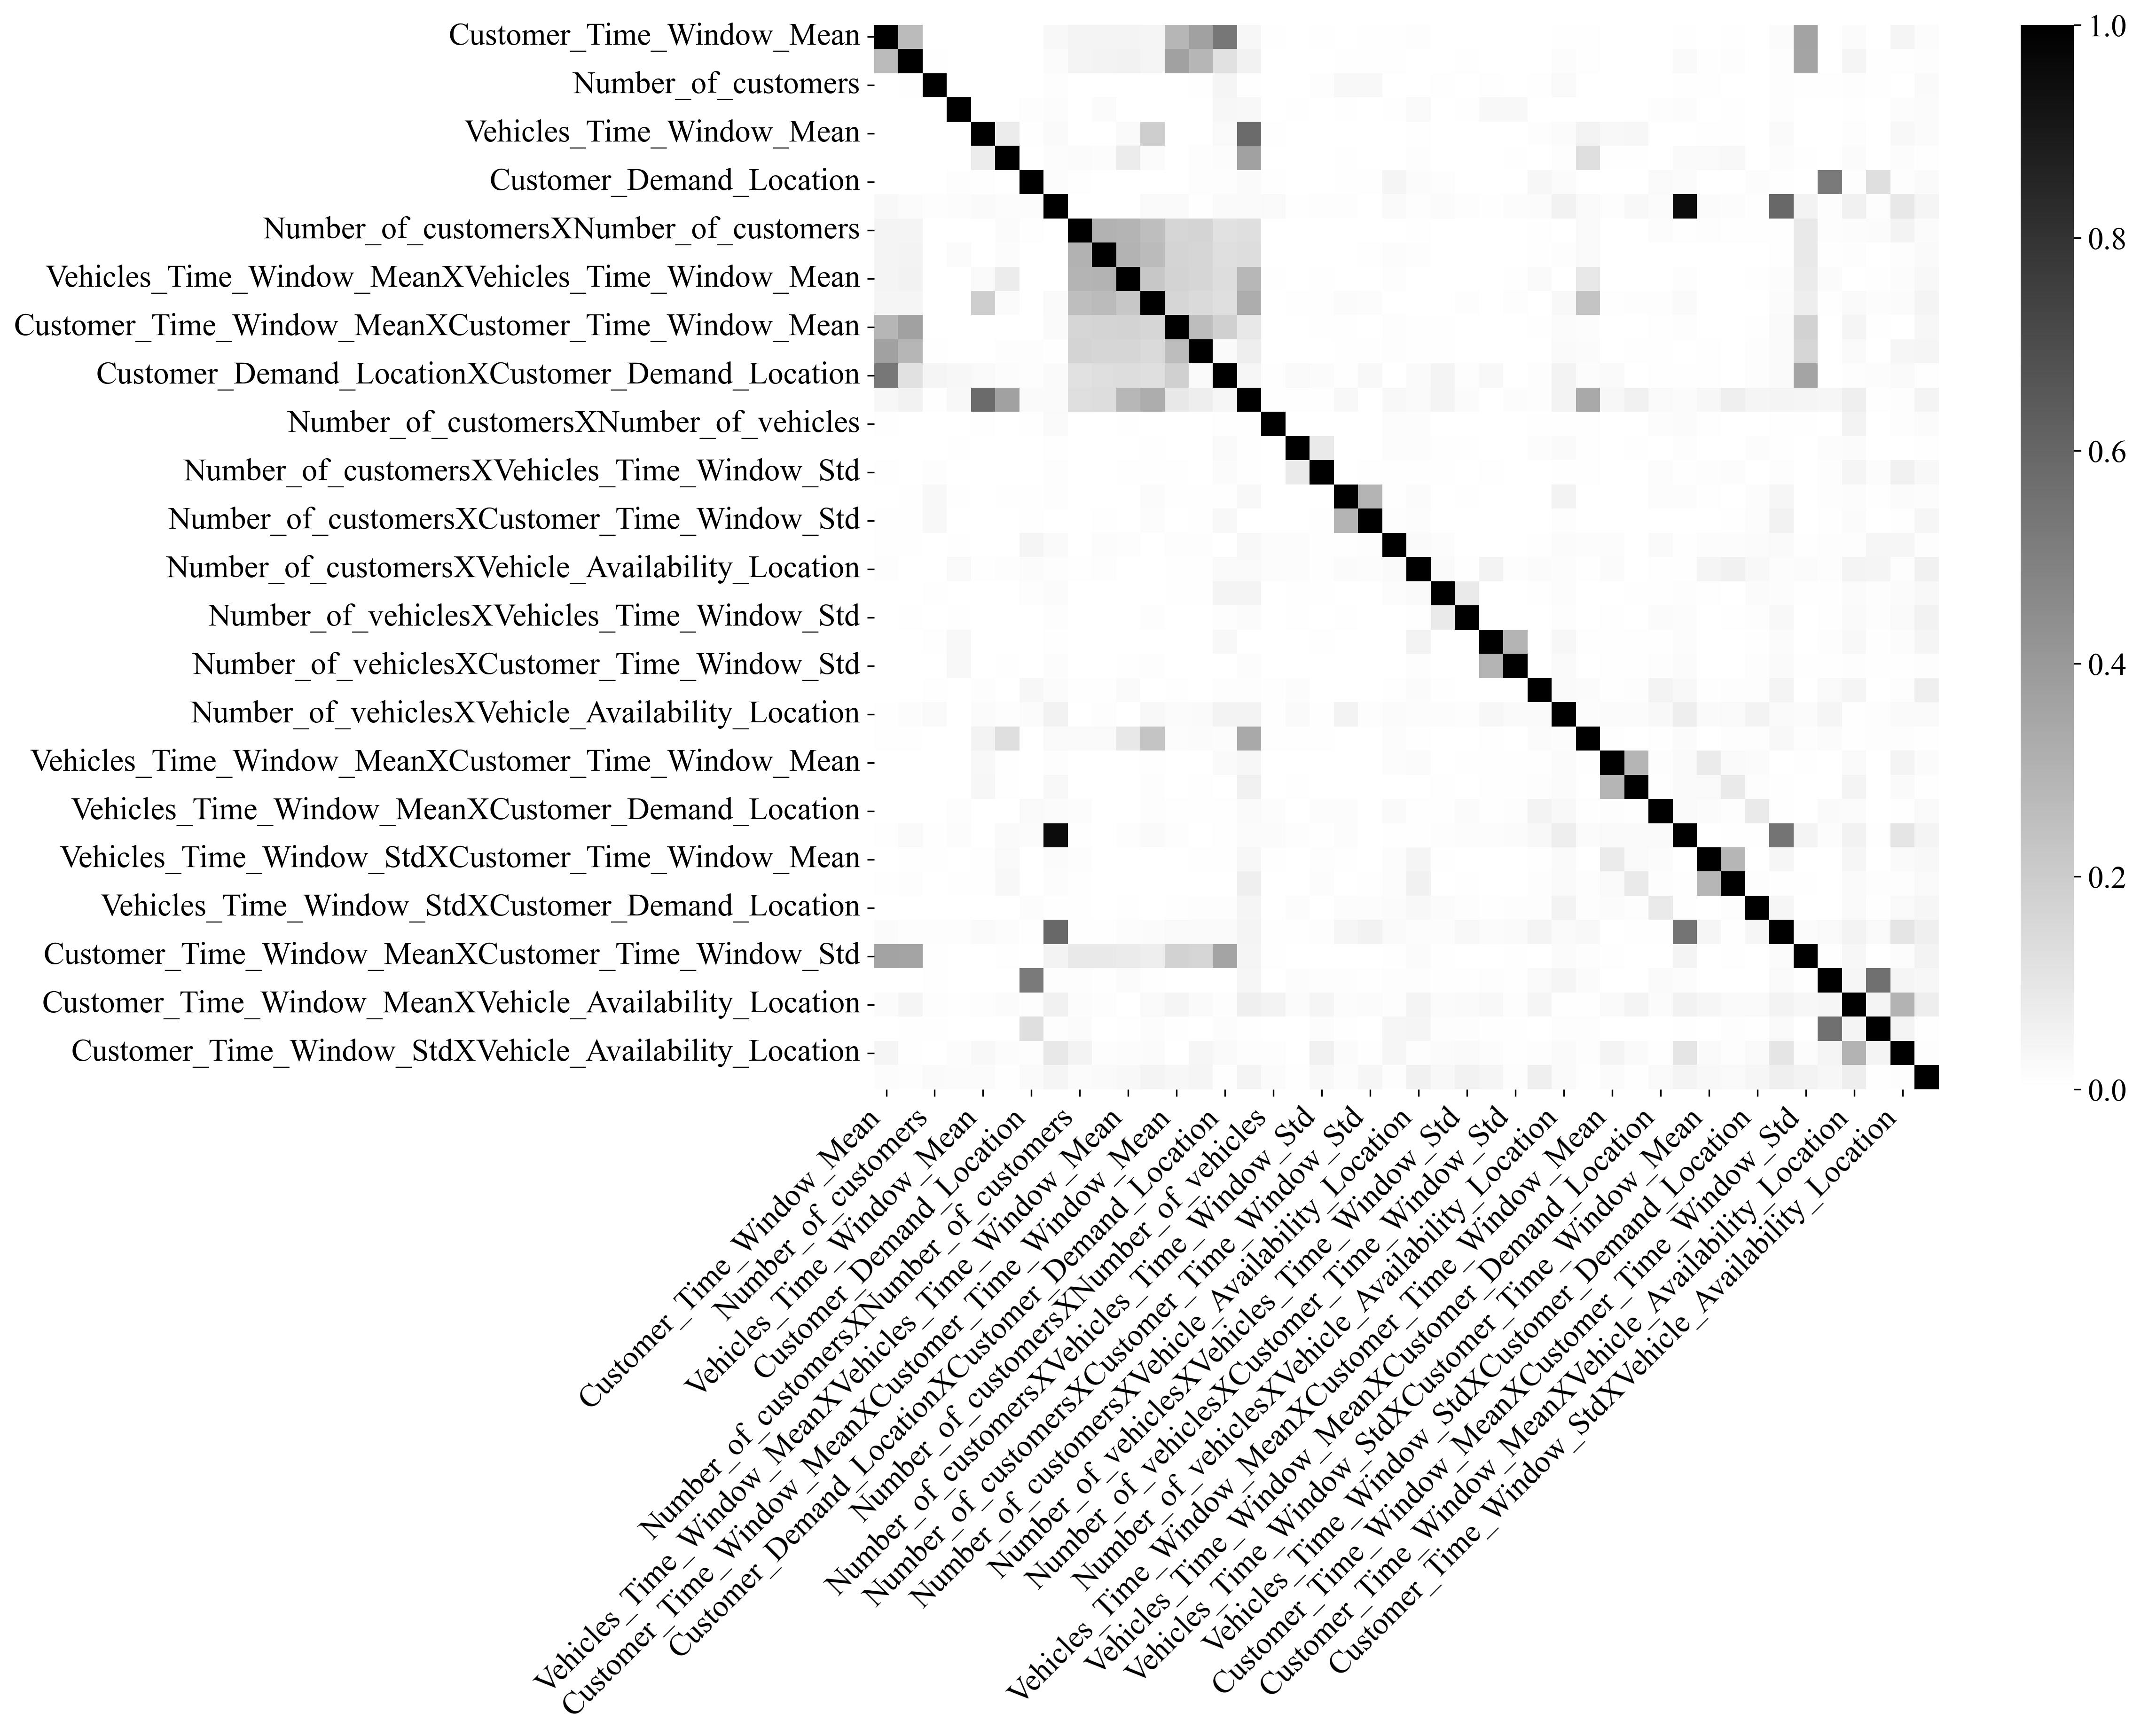

In [48]:
plot_corr_map(full_mat)

### Figure 5.30 Distribution of the number of customers and number of vehicles in the simulated instances

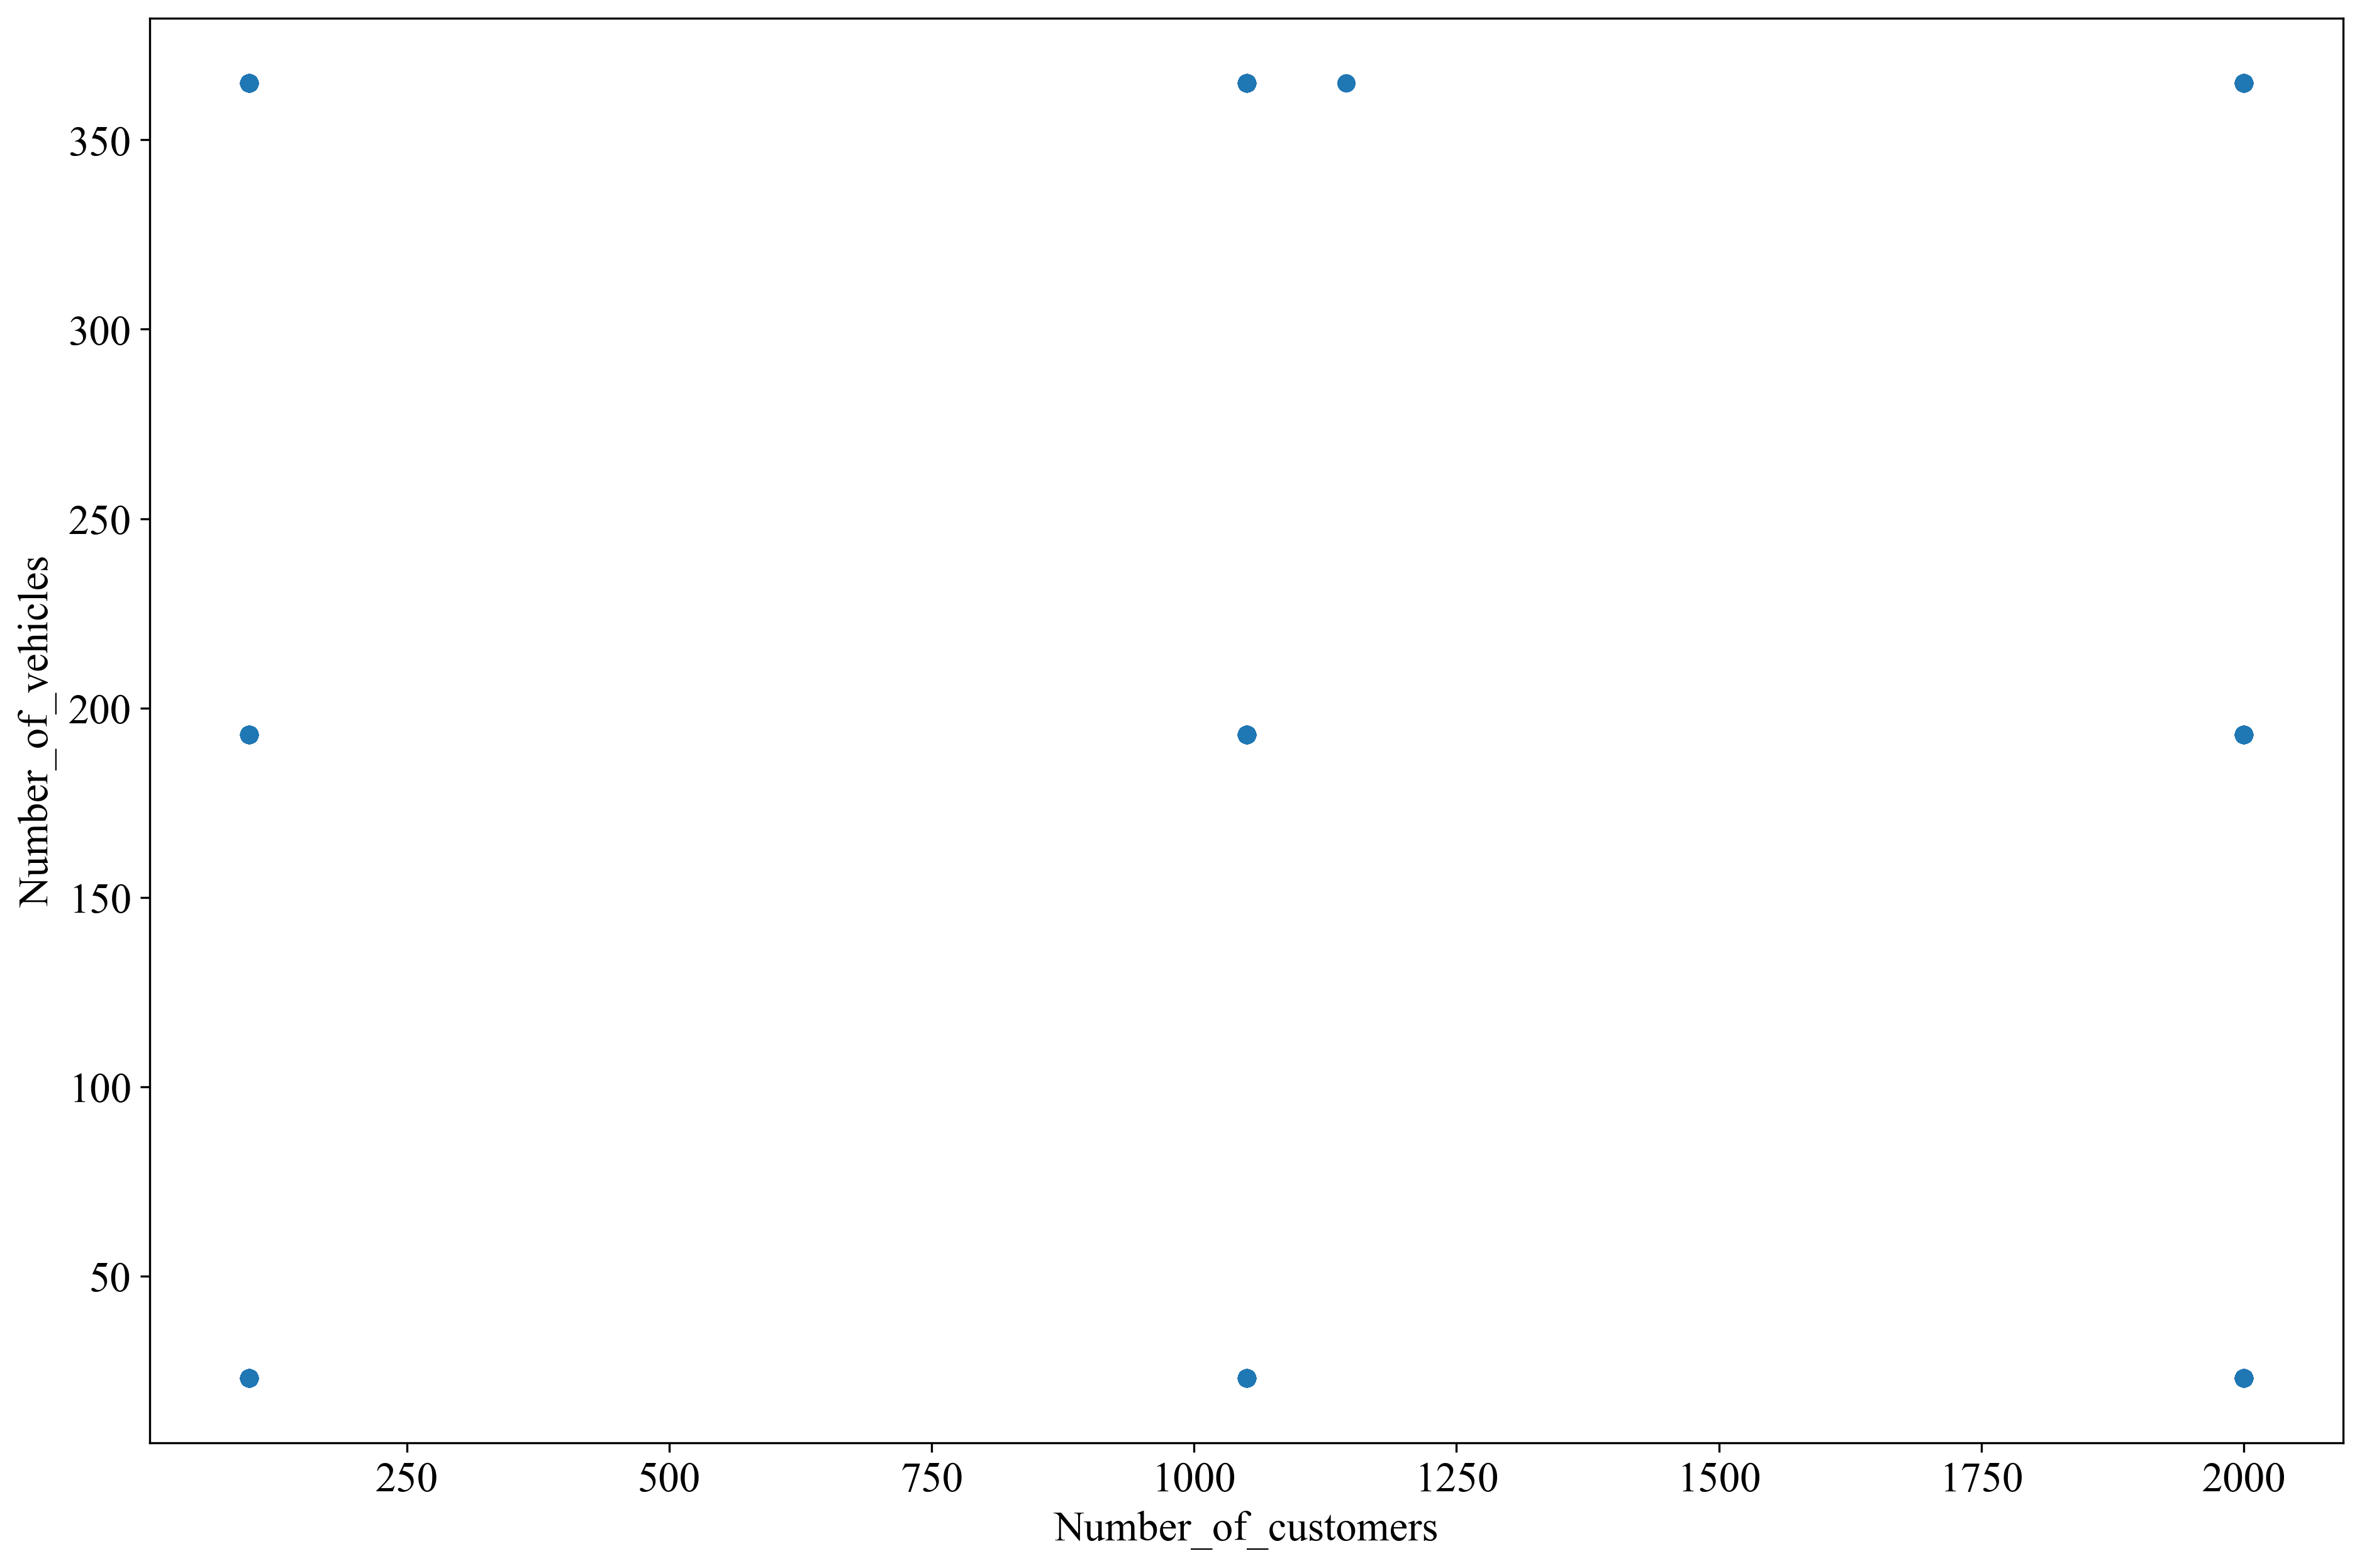

In [49]:
scatter_plot_simulation_check(file1,'Number_of_customers','Number_of_vehicles')

### Figure 5.31 Distribution of the customer demand location and vehicle availability location in the simulated instances

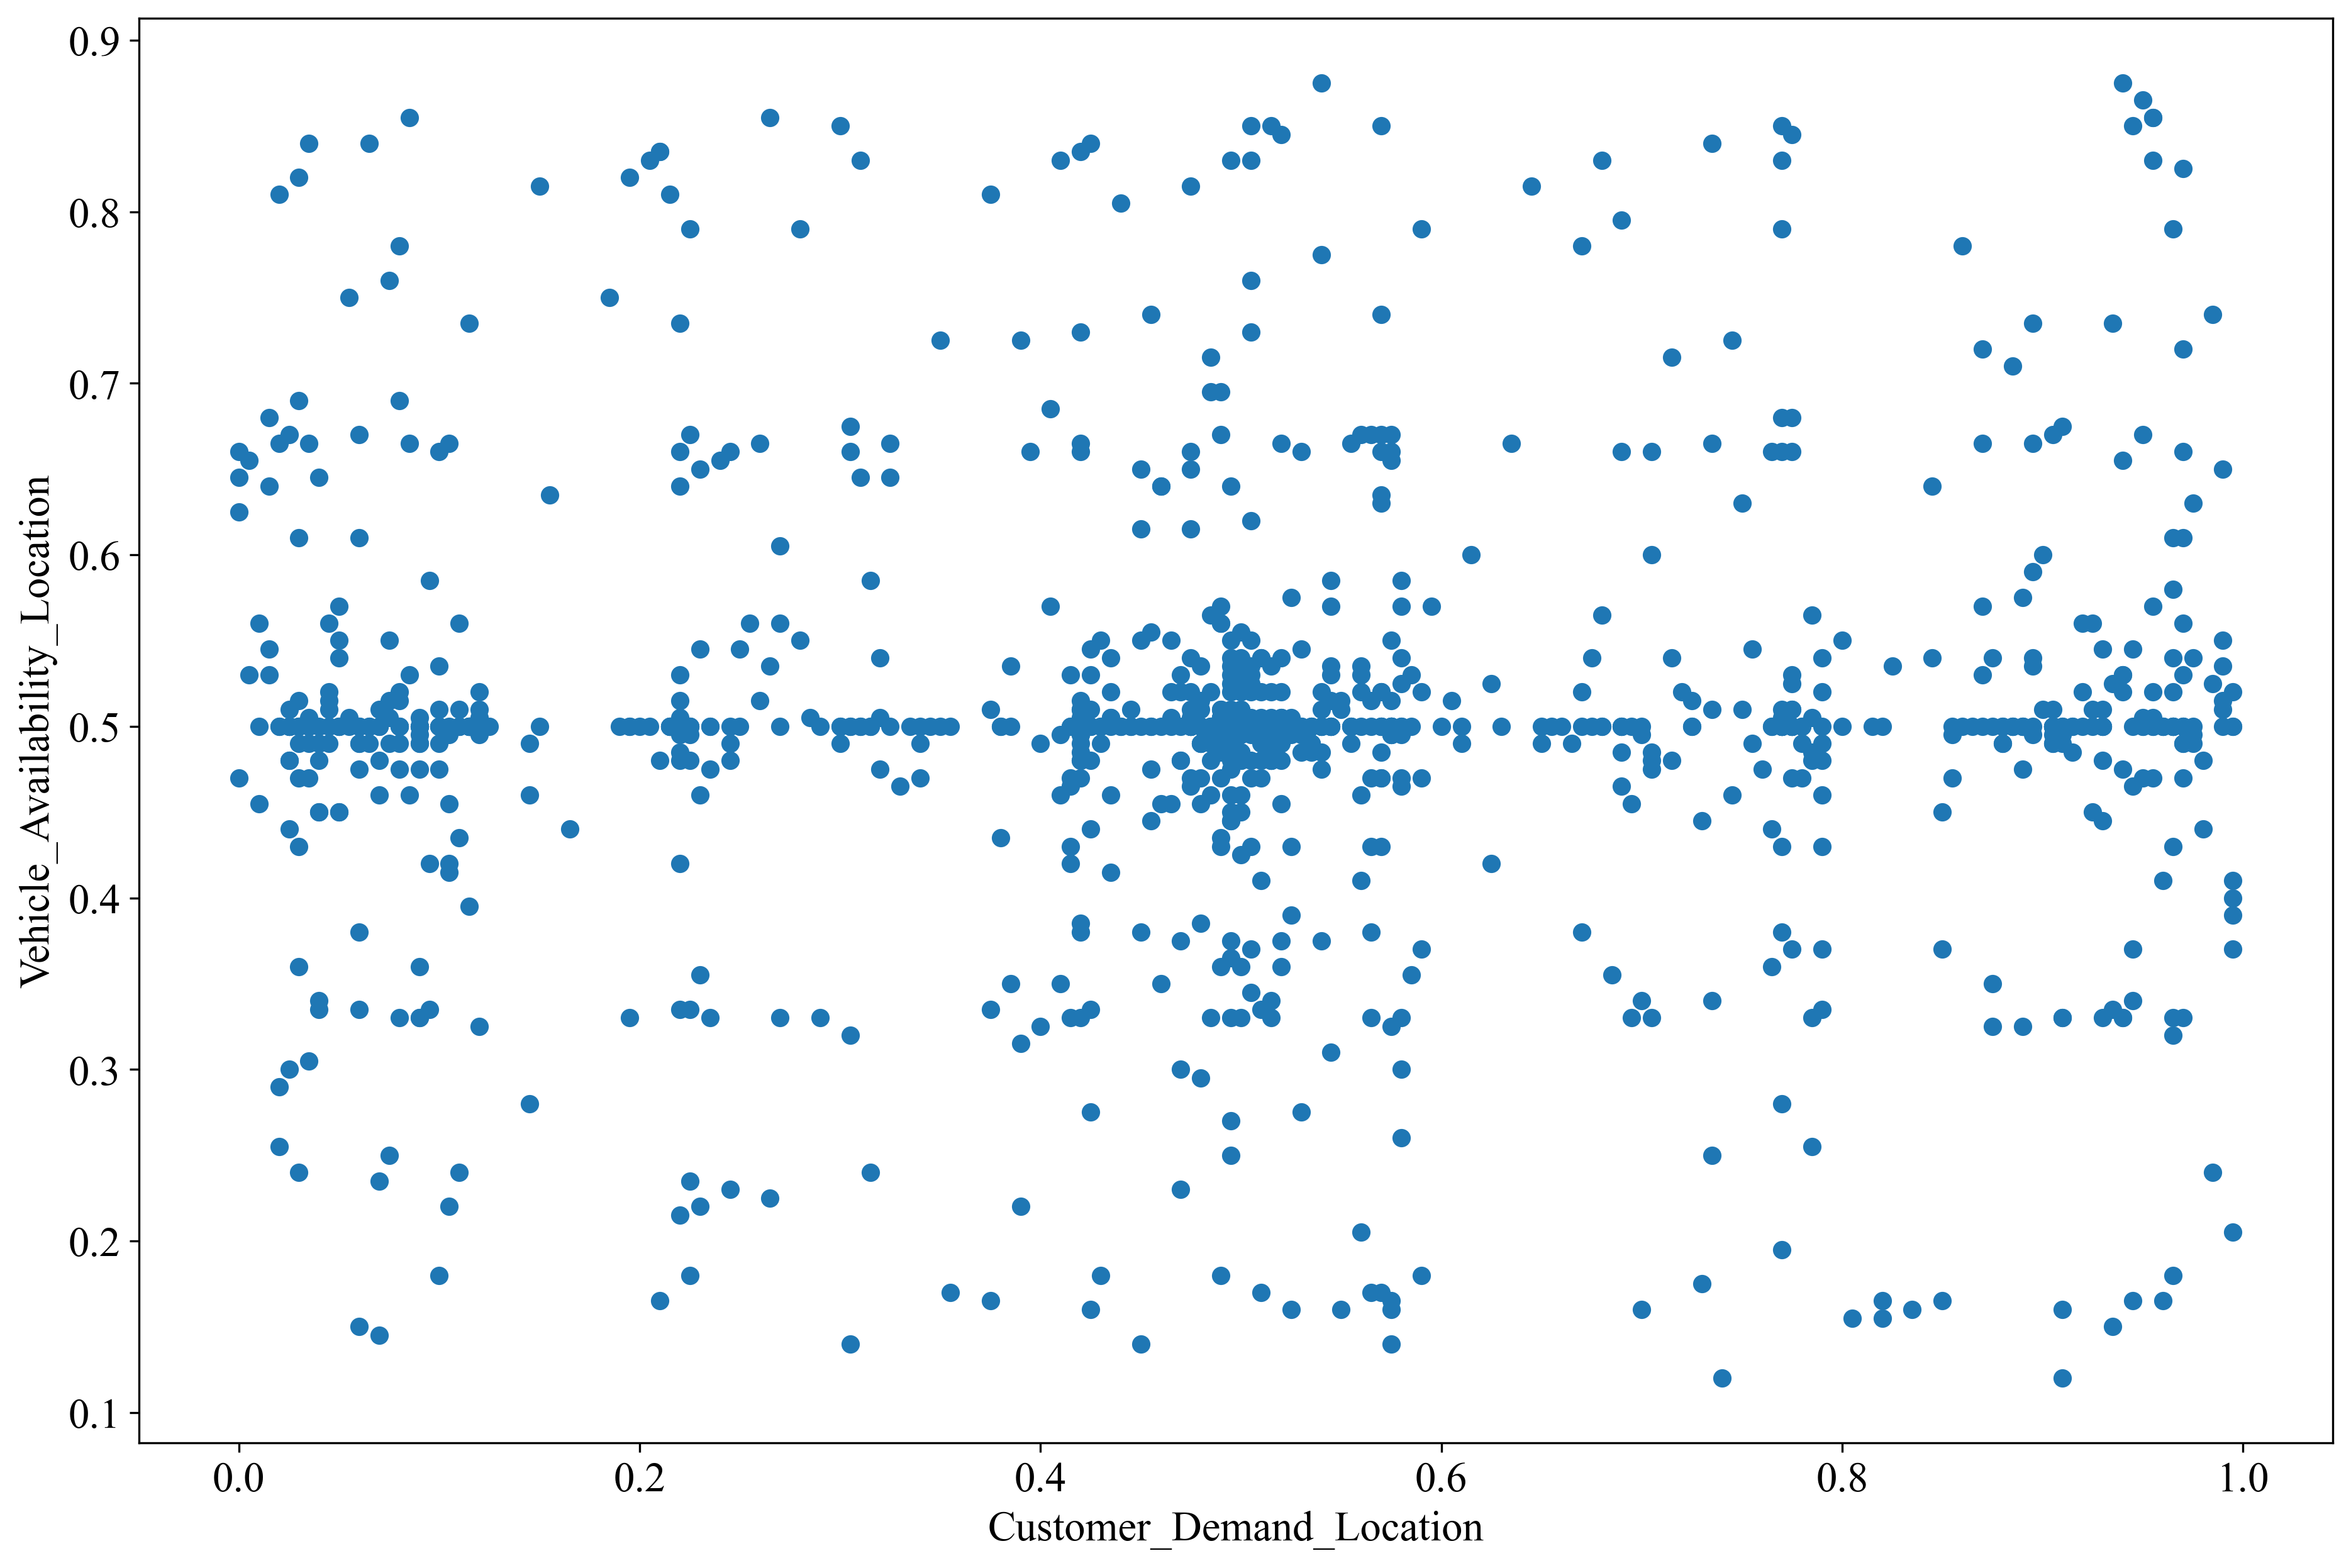

In [50]:
scatter_plot_simulation_check(file1,'Customer_Demand_Location','Vehicle_Availability_Location')

### Figure 5.32: Distribution of the customer time window length mean and standard deviation in the simulated instances

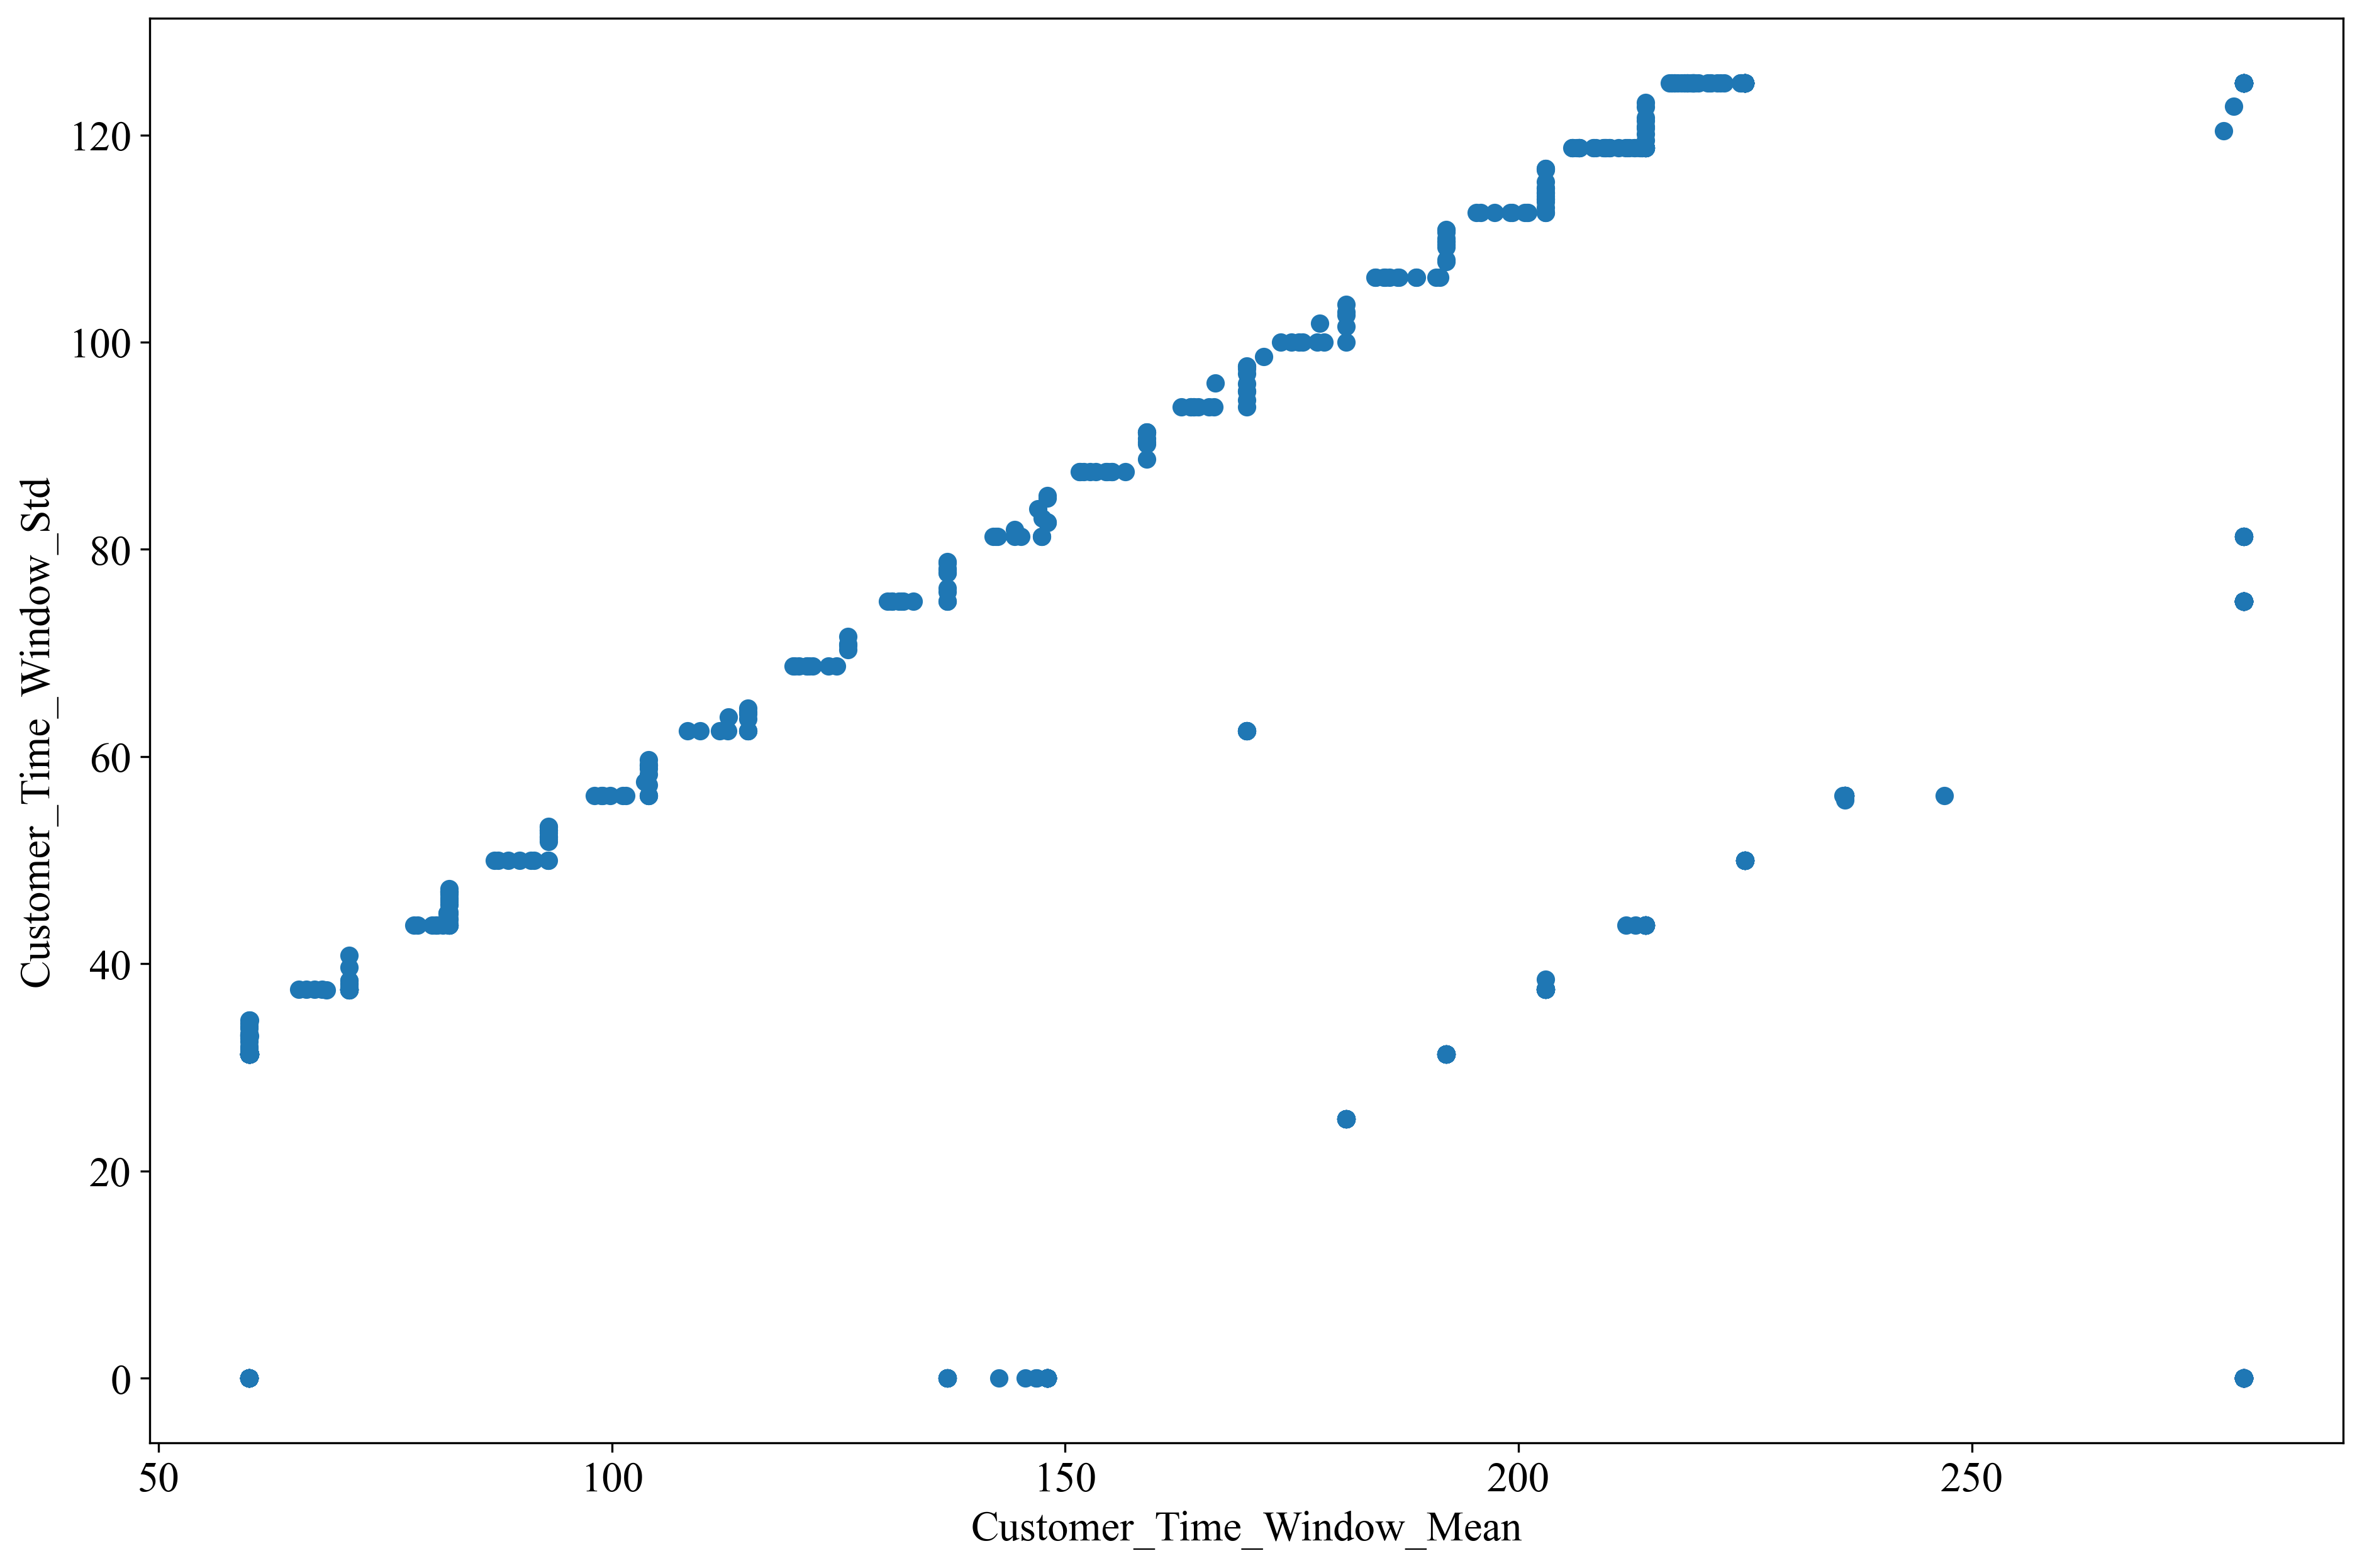

In [51]:
scatter_plot_simulation_check(file1,'Customer_Time_Window_Mean','Customer_Time_Window_Std')

### Figure 5.33: Distribution of the vehicle time window length mean and standard deviation in the simulated instances

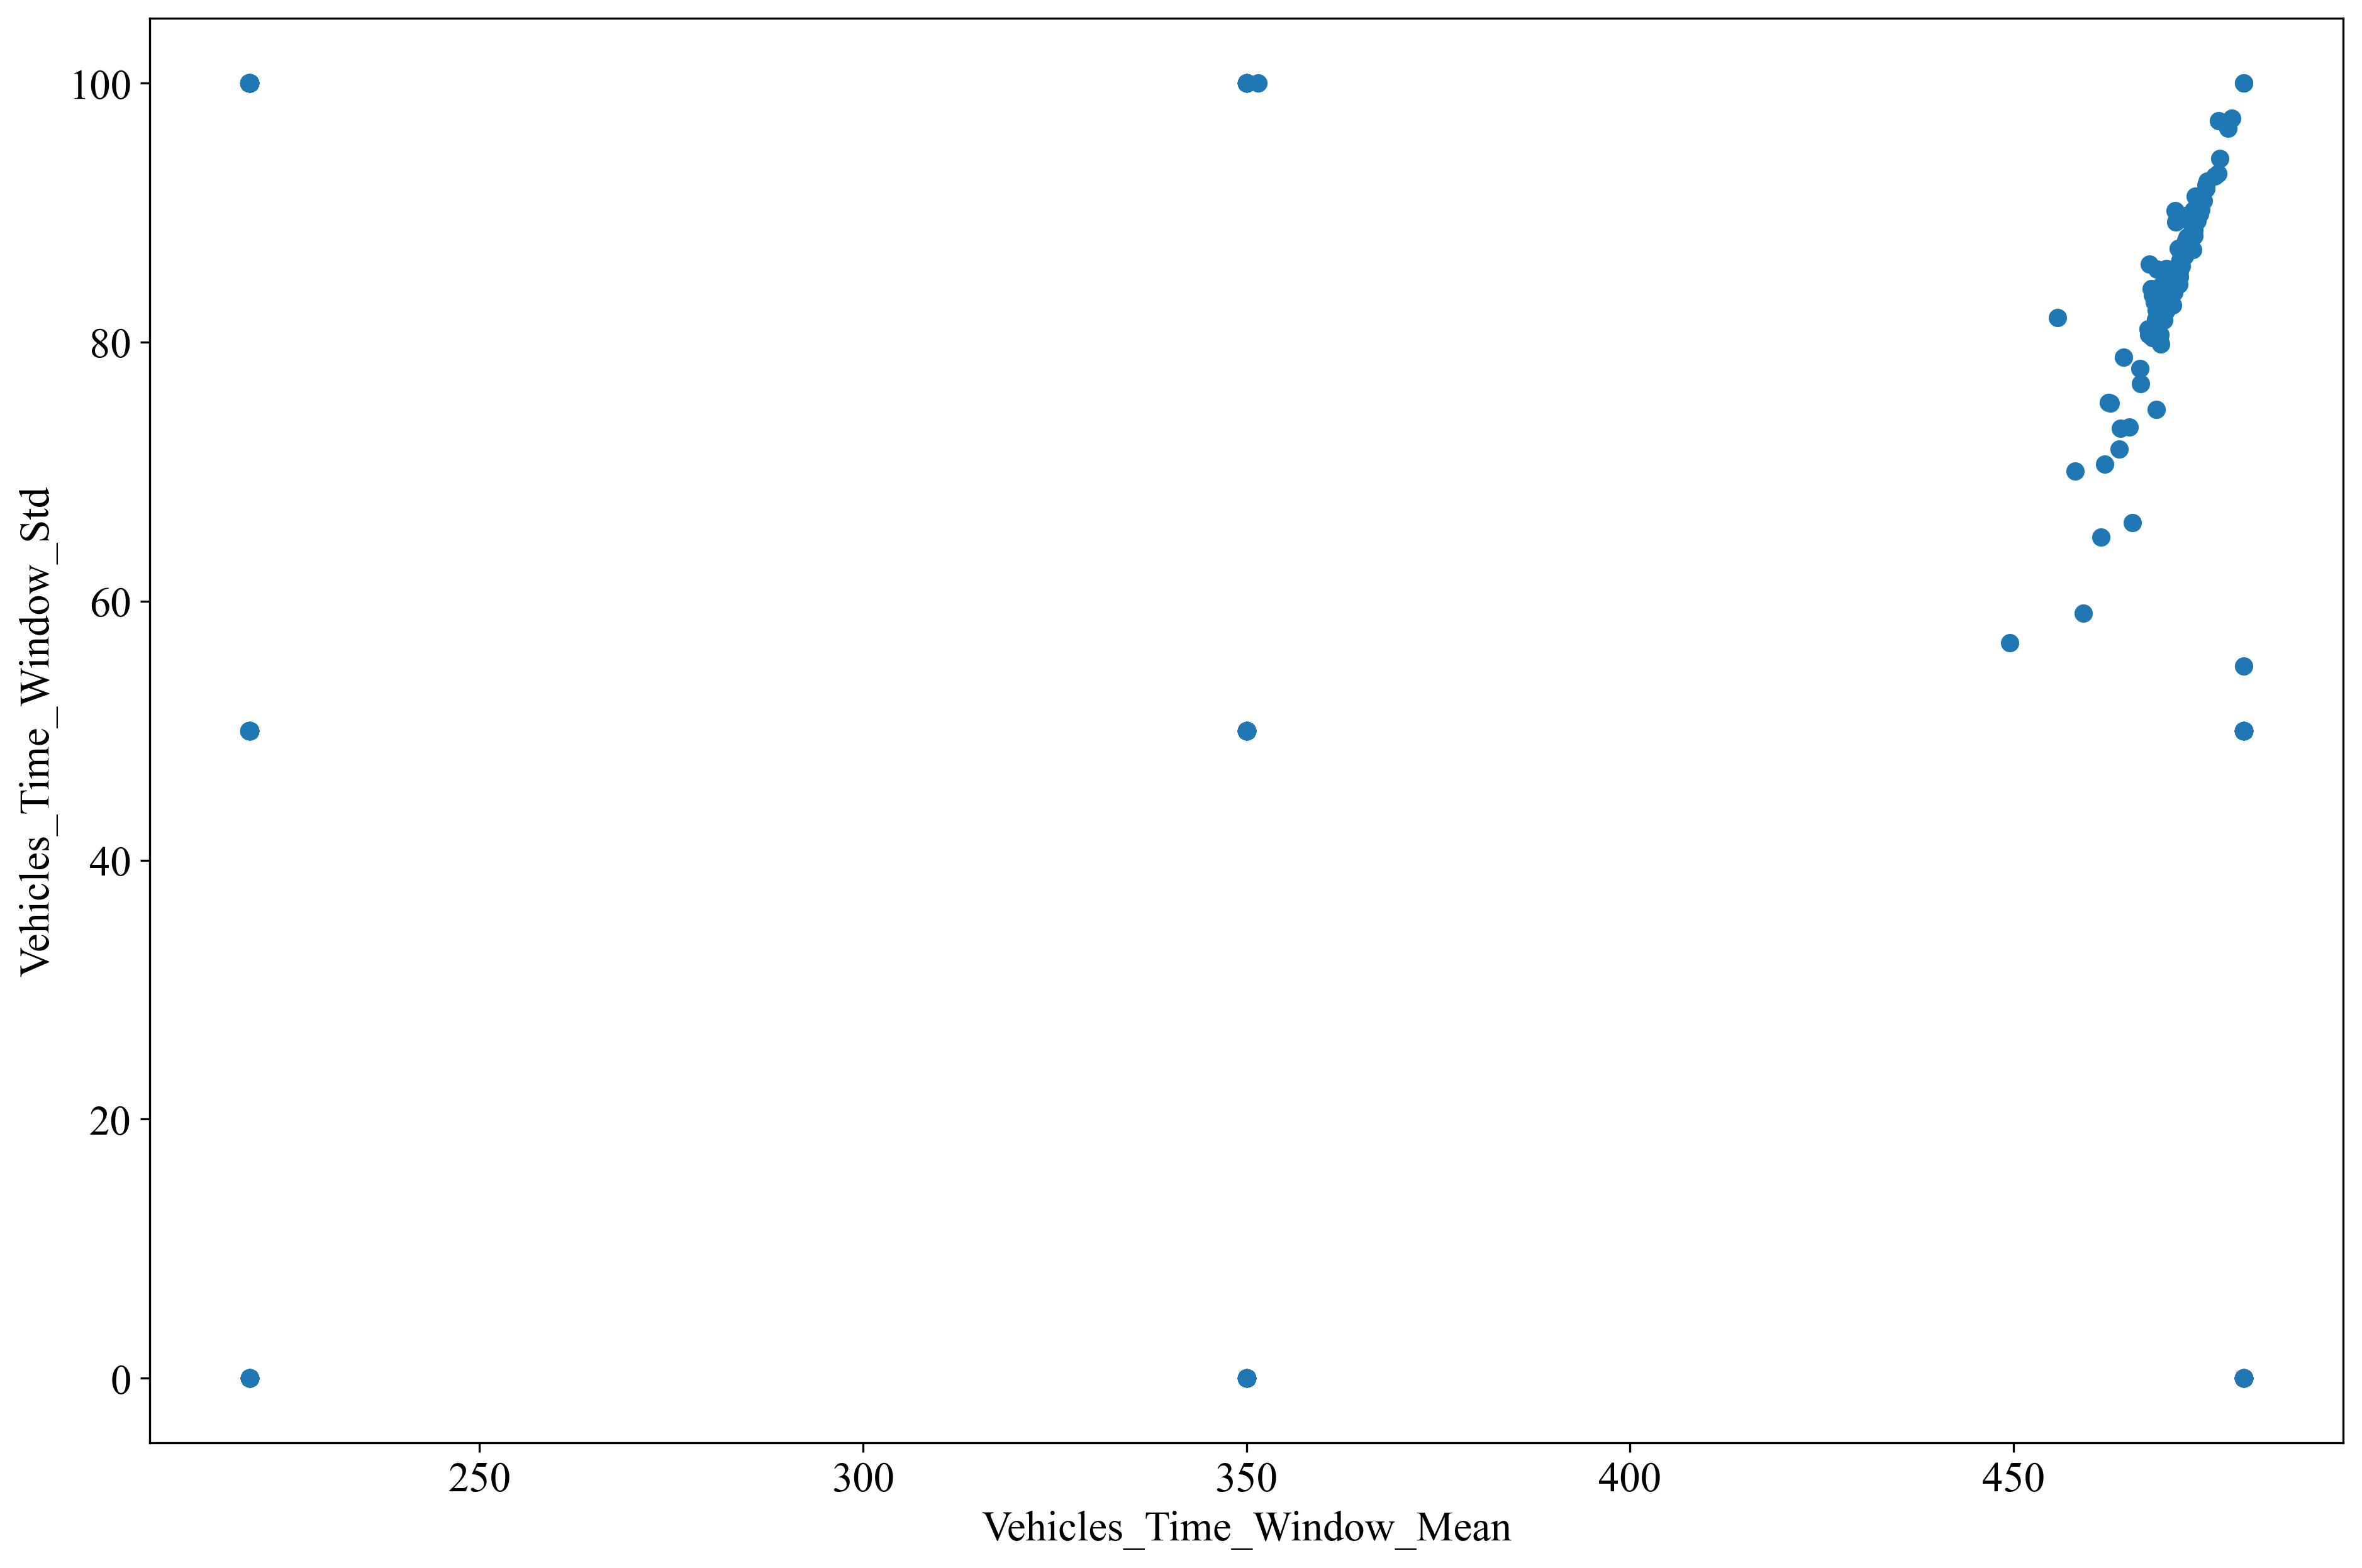

In [52]:
scatter_plot_simulation_check(file1,'Vehicles_Time_Window_Mean','Vehicles_Time_Window_Std')

### Error rate check

In [18]:
cust_num=file1['Dataset'].apply(lambda x: float(x.split('-')[1].split('_')[0]))
cust_tw_mean=file1['Dataset'].apply(lambda x: float(x.split('-')[2].split('_')[0]))
cust_tw_std=file1['Dataset'].apply(lambda x: float(x.split('-')[3].split('_')[0]))
customer_loc = file1['Dataset'].apply(lambda x: float(x.split('-')[4].split('_')[0]))
vehicle_loc = file1['Dataset'].apply(lambda x: float(x.split('-')[-2].split('_')[0]))
veh_num=file1['Dataset'].apply(lambda x: float(x.split('-')[8].split('_')[0]))
veh_tw_mean=file1['Dataset'].apply(lambda x: float(x.split('-')[9].split('_')[0]))
veh_tw_std=file1['Dataset'].apply(lambda x: float(x.split('-')[10].split('_')[0]))
real = file1[['Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
       'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std']]

In [21]:
np.mean(np.absolute(cust_num-file1['Number_of_customers'])/file1['Number_of_customers'])

0.0

In [23]:
np.mean(np.absolute(veh_num-file1['Number_of_vehicles'])/file1['Number_of_vehicles'])

0.01773788079761106

In [24]:
np.mean(np.absolute(cust_tw_mean-file1['Customer_Time_Window_Mean'])/file1['Customer_Time_Window_Mean'])

1.331238466467819e-05

In [25]:
np.mean(np.absolute(cust_tw_std-file1['Customer_Time_Window_Std'])/file1['Customer_Time_Window_Std'])

0.005486539394981624

In [26]:
np.mean(np.absolute(veh_tw_mean-file1['Vehicles_Time_Window_Mean'])/file1['Vehicles_Time_Window_Mean'])

0.002814978398956166

In [27]:
np.mean(np.absolute(veh_tw_std-file1['Vehicles_Time_Window_Std'])/file1['Vehicles_Time_Window_Std'])

0.04039940682283806

In [31]:
np.mean(np.absolute(customer_loc-file1['Customer_Demand_Location']))

0.11443627450980427

In [38]:
np.mean(np.absolute(vehicle_loc-file1['Vehicle_Availability_Location']))

0.25156372549019484